<a href="https://colab.research.google.com/github/PatilTruptiU/Sentiment-Analysis-Predicting-sentiment-of-COVID-19-tweets/blob/main/Copy_of_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

#Importing model library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import  accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score
from sklearn.metrics import accuracy_score

import nltk
nltk.download('all',quiet=True)
from nltk.corpus import stopwords
import string 
import re
from wordcloud import WordCloud


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# upload the dataset
dataframe = pd.read_csv('/content/drive/MyDrive/almabetter/projects/3.ML Supervised classification /Coronavirus Tweets.csv',encoding='latin-1')

Latin-1  is a character encoding standard. It defines a set of characters used for major western European languages.

## Explore the data :

In [4]:
dataframe.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
#Dimension of dataset
dataframe.shape

(41157, 6)

here for analysis we does not need username and ScreenName so we drop it  

In [6]:
dataframe.drop(columns=['UserName', 'ScreenName'],axis=1,inplace=True)

In [7]:
#basic statistic info of dataset
dataframe.describe()

,Location,TweetAt,OriginalTweet,Sentiment
count,32567,41157,41157,41157
unique,12220,30,41157,5
top,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,540,3448,1,11422


In [8]:
#summary of dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       32567 non-null  object
 1   TweetAt        41157 non-null  object
 2   OriginalTweet  41157 non-null  object
 3   Sentiment      41157 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [9]:
dataframe.columns

Index(['Location', 'TweetAt', 'OriginalTweet', 'Sentiment'], dtype='object')

###**EDA**: 
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

In [10]:
#for Tweet at column
# dates at which tweet is done 
dataframe['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

here we have to extract day month and year

In [11]:
# function to change the string format to date

from datetime import datetime

def change_to_timestamp(column):
  return datetime.strptime(column,'%d-%m-%Y')

#applying the above function to 'TweetAt' column

dataframe['TweetAt'] = dataframe['TweetAt'].apply(change_to_timestamp)

In [12]:
#getting the day, month from 'TweetAt' column

dataframe['Tweetday'] = dataframe['TweetAt'].apply(lambda x : x.day)
dataframe['TweetMonth'] = dataframe['TweetAt'].apply(lambda x : x.month)


In [13]:
dataframe['TweetMonth'].unique()

array([3, 4])

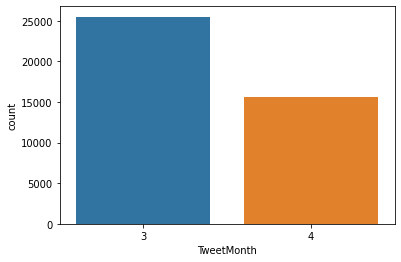

In [14]:
sns.countplot(x=dataframe['TweetMonth'])

from this we say tweet data is of two months only march and april 
maximum tweet is done in march month as compair to April

In [15]:
#now finding tweetdays per month and their count

In [16]:
dataframe['TweetMonth'] = dataframe['TweetAt'].apply(lambda x : x.day)

In [17]:
dataframe['Tweetday'].unique()

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [18]:
list_month_3 = []
list_month_4 = []
for i in range(len(dataframe['TweetAt'])):
  if dataframe['TweetAt'][i].month == 3:
    list_month_3.append(dataframe['TweetAt'][i].day)
  if dataframe['TweetAt'][i].month == 4:
    list_month_4.append(dataframe['TweetAt'][i].day) 

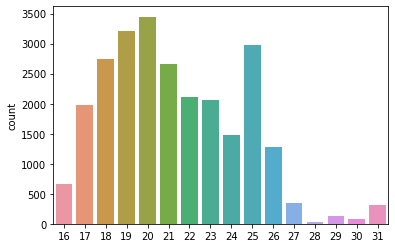

In [19]:
sns.countplot(x=list_month_3)

In the month of march on the date of 20th march maximum tweet are tweeted which is followed by 19 march and followed by 25 march.

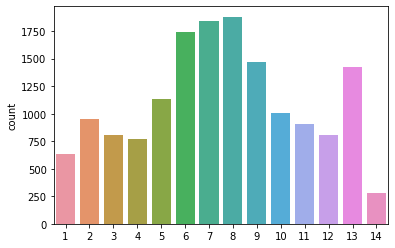

In [20]:
sns.countplot(x=list_month_4)


in the month of April on the date of 8th march and 7th march and 6th march maximum tweets are tweeted. 

In [21]:
#unique value in sentiment columns
dataframe['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

here we can say that our data is divided into five type of sentiments

In [22]:
count=dataframe['Sentiment'].value_counts().reset_index()
count.columns=['Sentiment','count']
count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

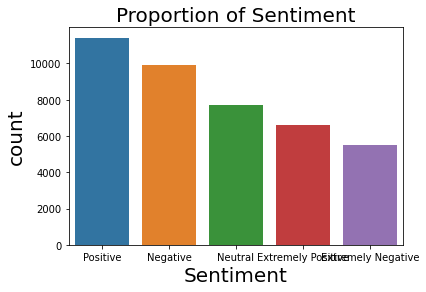

In [23]:
ax = sns.barplot(x="Sentiment", y='count', data=count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

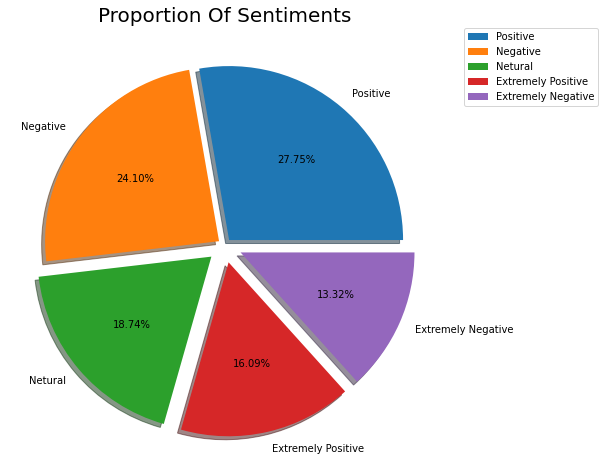

In [24]:
# Plotting the piechart for Sentiments distribution
sentiment_count = dataframe['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural','Extremely Positive','Extremely Negative']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count,explode=[0.04,0.04,0.1,0.1,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### For EDA alternatively we can use sweetviz automatic visualization tool

In [25]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import sweetviz
x= dataframe.drop(['Sentiment'], axis=1)
y= dataframe['Sentiment']

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



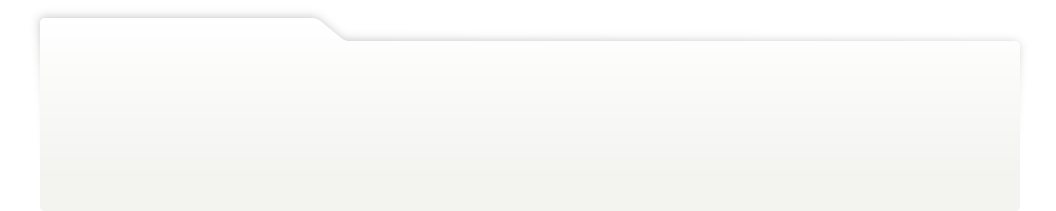
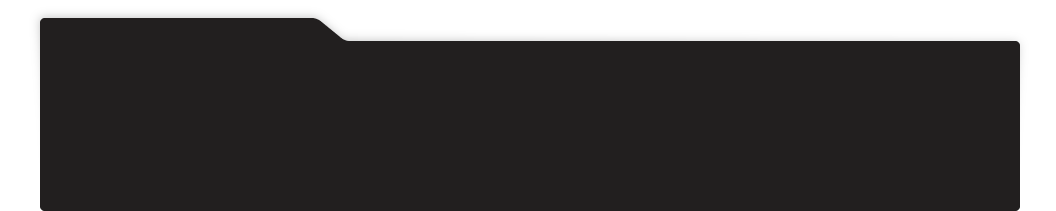
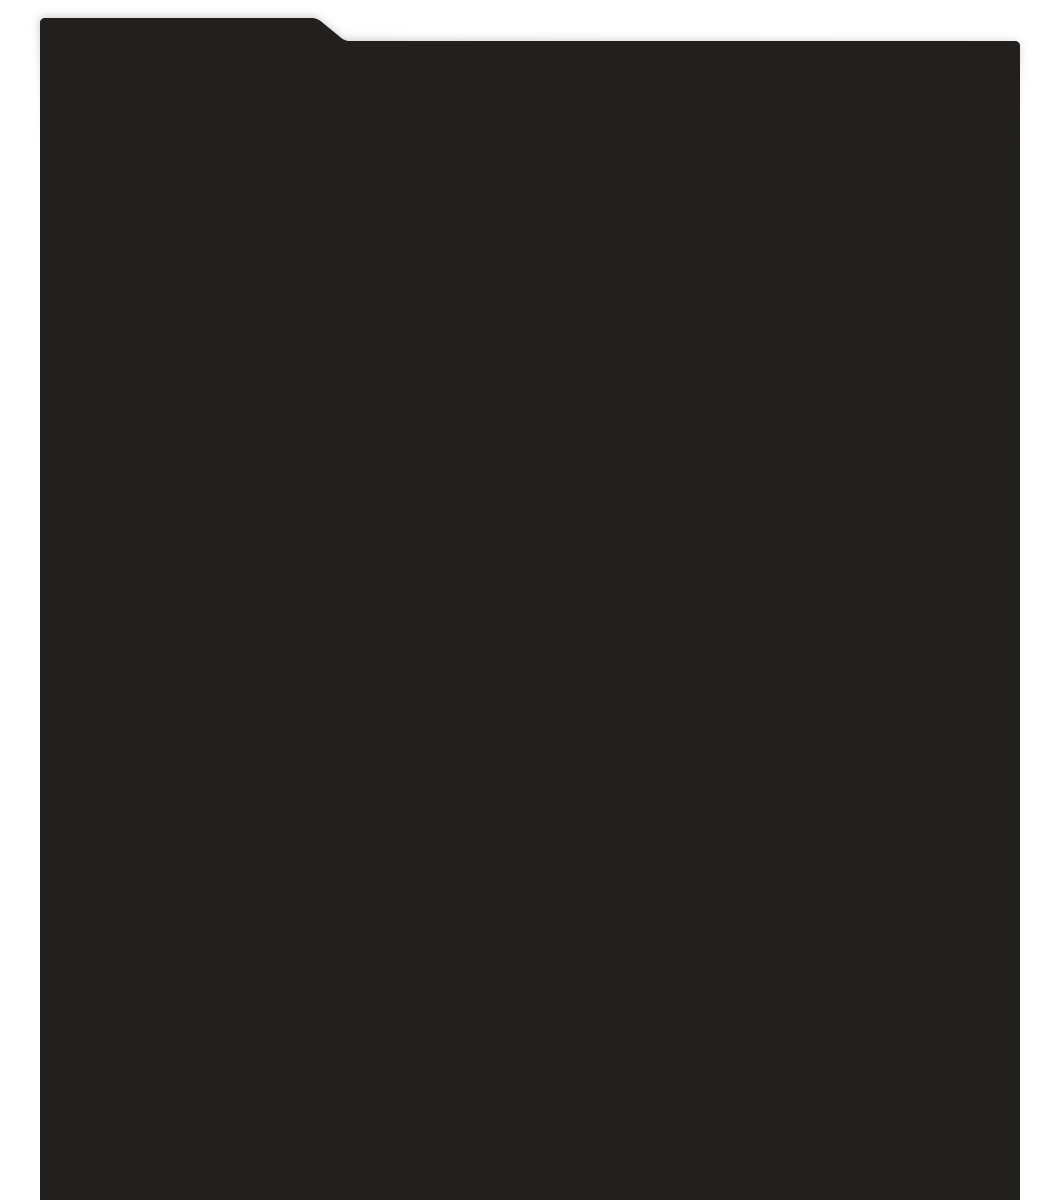
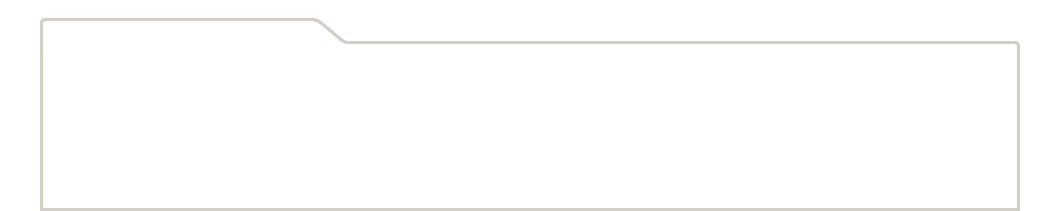
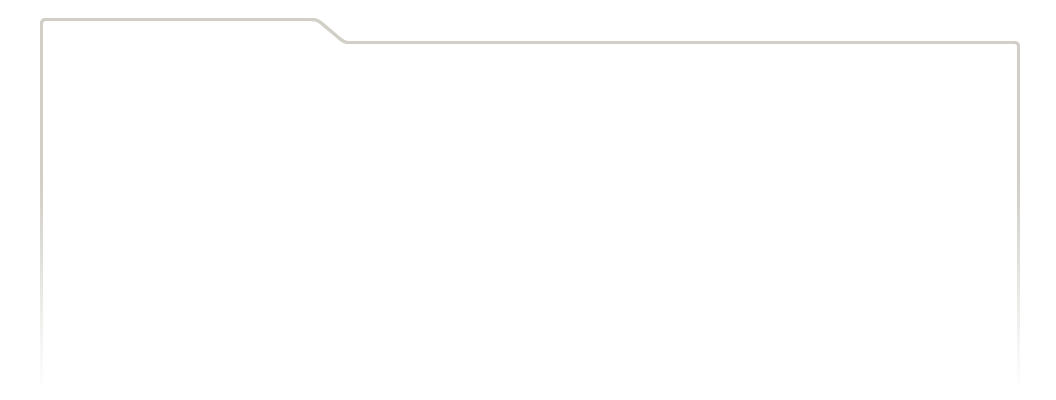
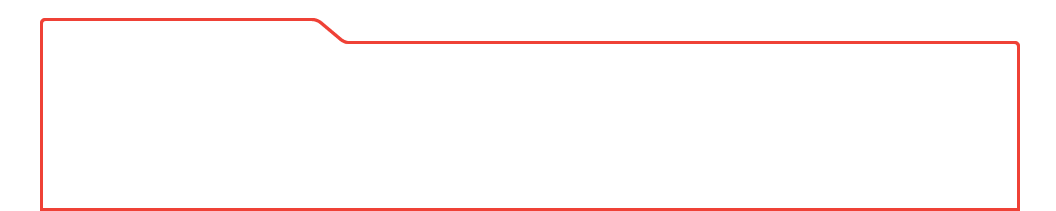
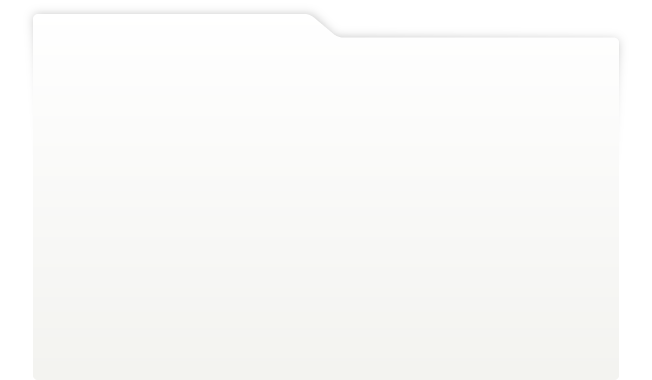
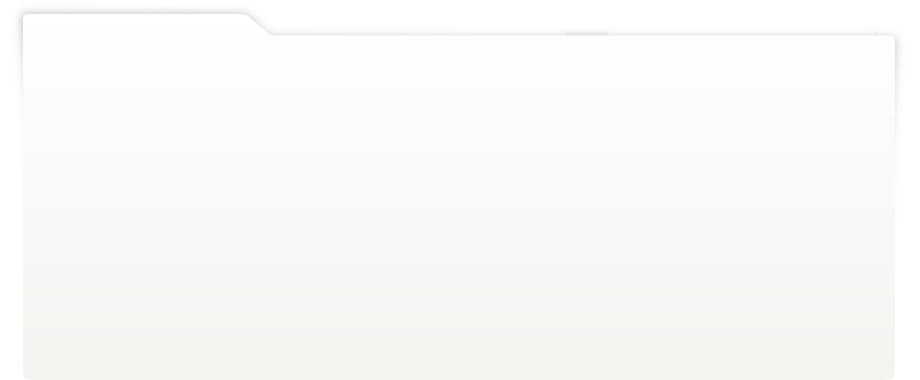
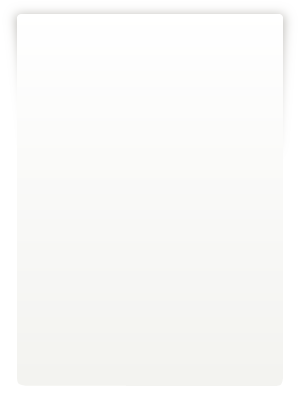
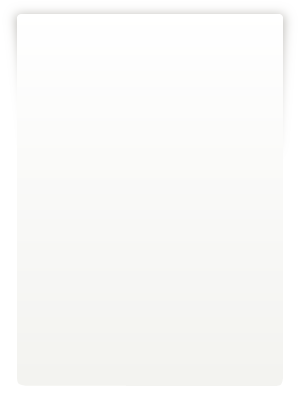
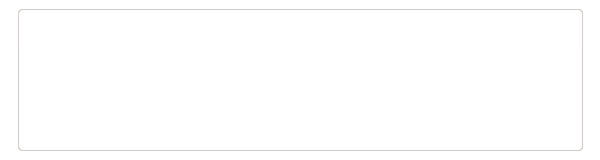
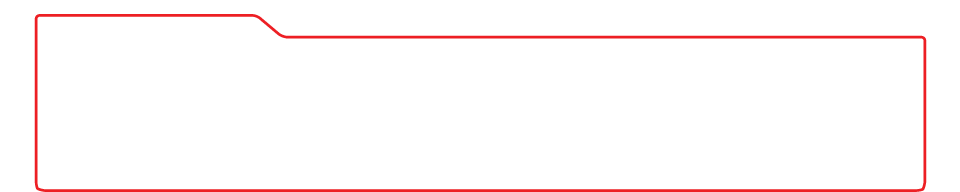
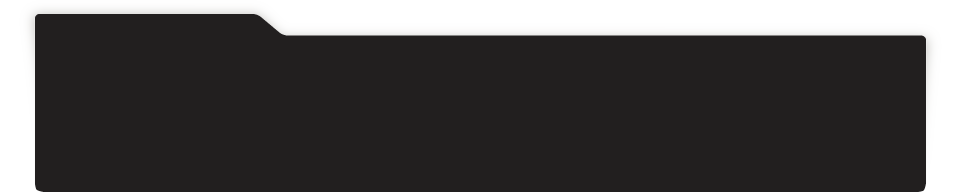
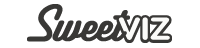
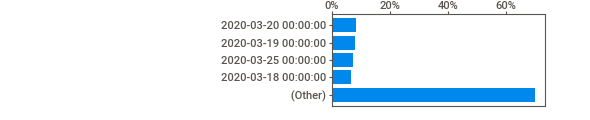
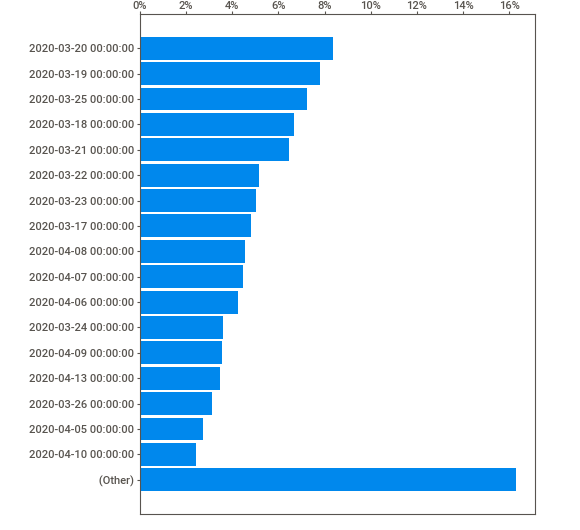
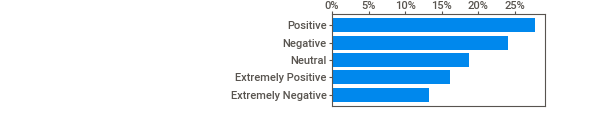
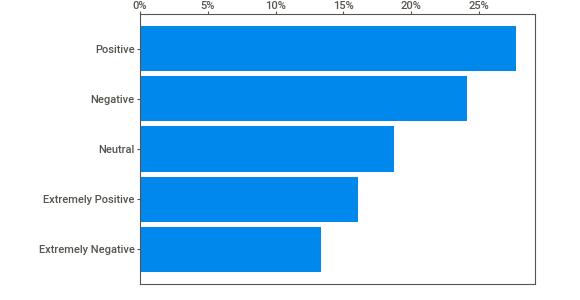
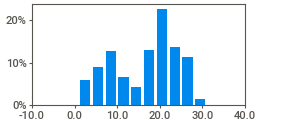
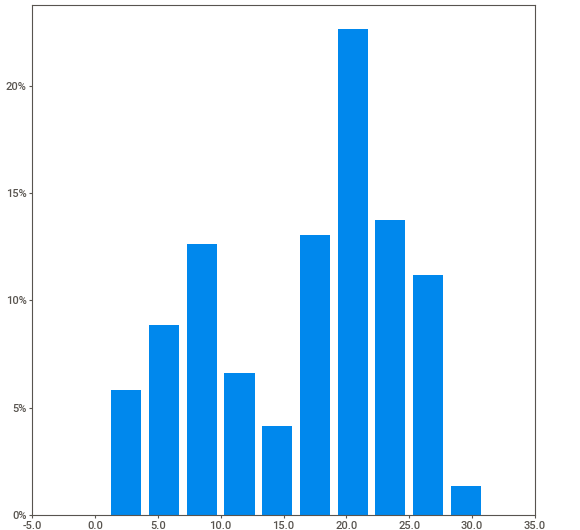
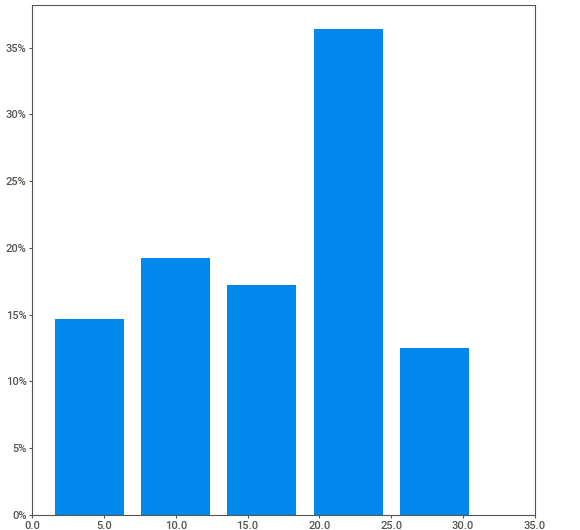
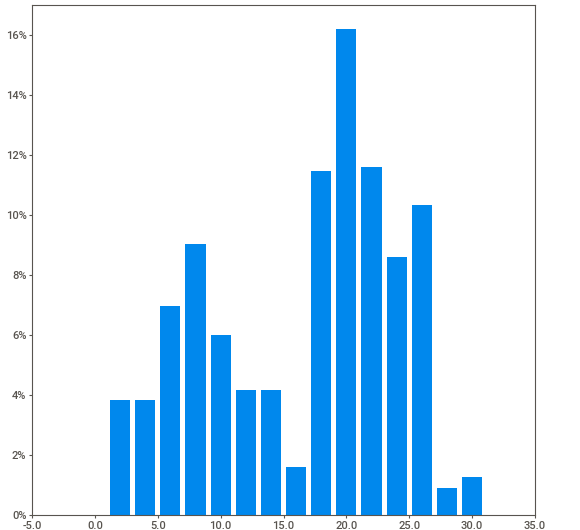
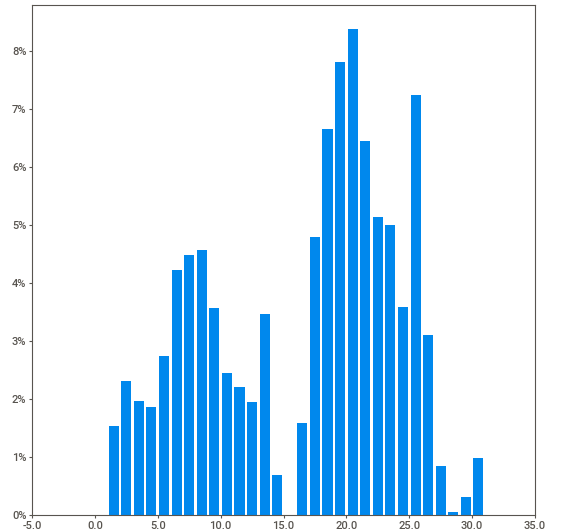
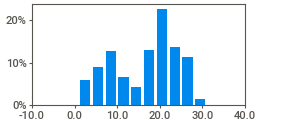
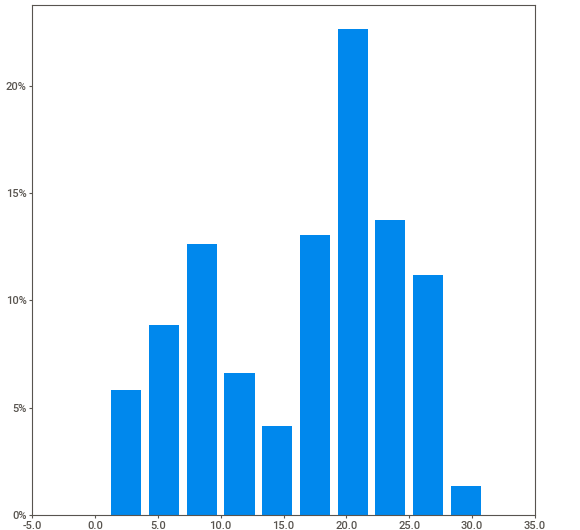
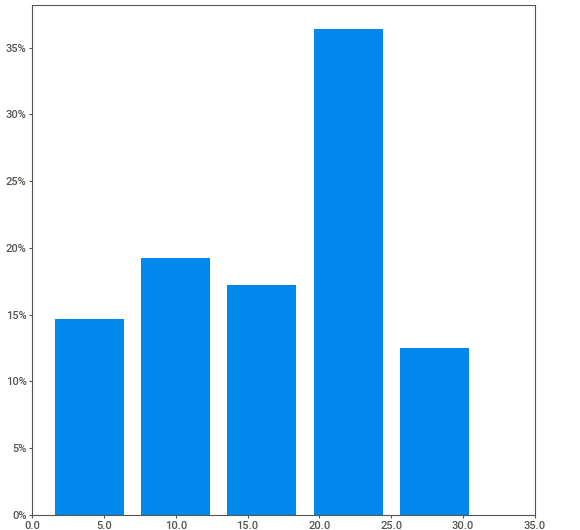
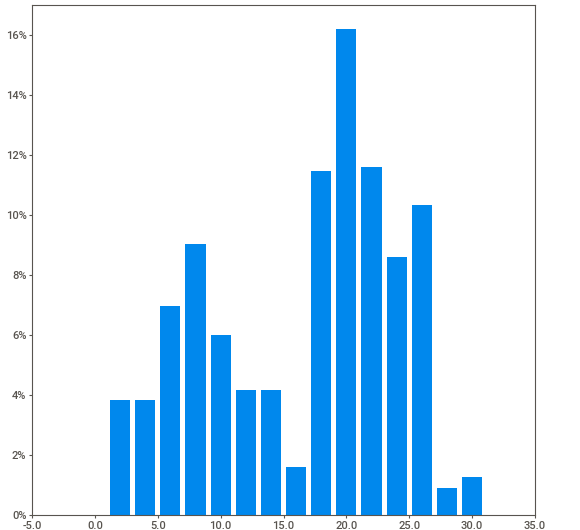
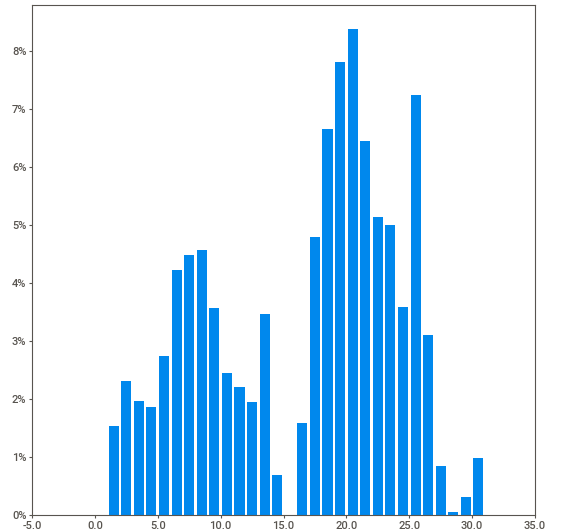
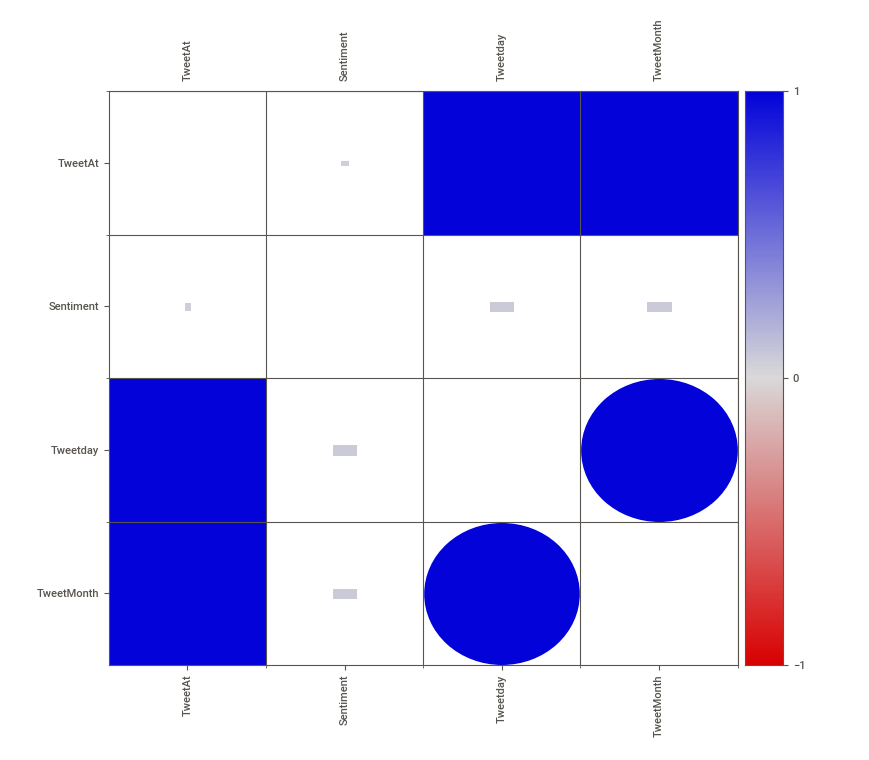
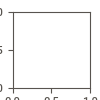

In [27]:
#creating a EDA report
import sweetviz as sv
analyze_report = sv.analyze(dataframe)
analyze_report.show_html('analyze.html', open_browser=False)
import IPython
IPython.display.HTML('analyze.html')

### when we deal with  text data  we use the NLP ( Natural language processing)

NLP is technology that is used by machine to understand , analyse and manipulate and interprit the human langeage. NLP motivate to design the technology  that understand the human language more efficiently.

NLP includes the following steps :

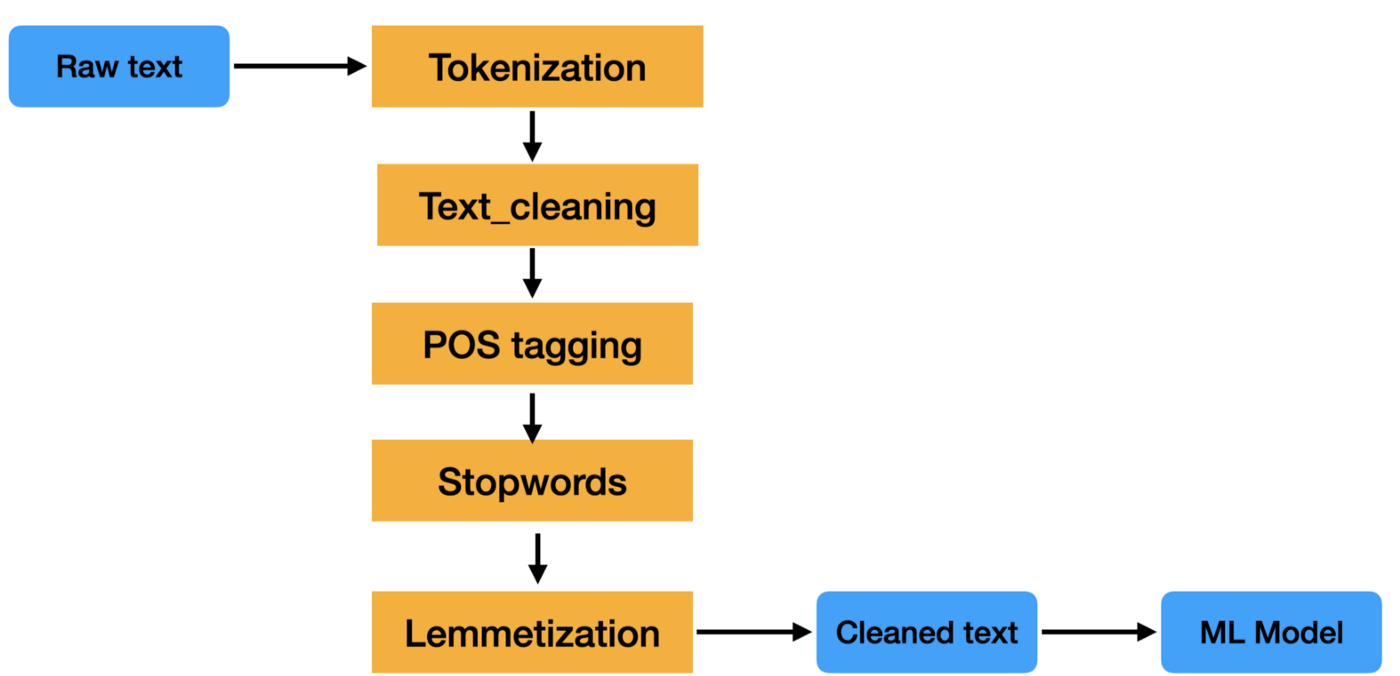

### **text preprocessing**

In [28]:
# now for further sentiment analysis we consider noly two featureas i.e. 'OriginalTweet'and 'Sentiment'

In [29]:
df= dataframe[['OriginalTweet','Sentiment']]

In [30]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [31]:
#checking the count of the dependent variable
count=dataframe['Sentiment'].value_counts().reset_index()
count.columns=['Sentiment','count']
count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


In [32]:
df['OriginalTweet'][12],df['OriginalTweet'][440]

('#horningsea is a caring community. LetÂ\x92s ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh',
 'Off to play supermarket bingo....will I get everything I need? Probably not..#covid?19uk #headache #COVID2019')

from this tweet we understand that we need to do text preprocessing

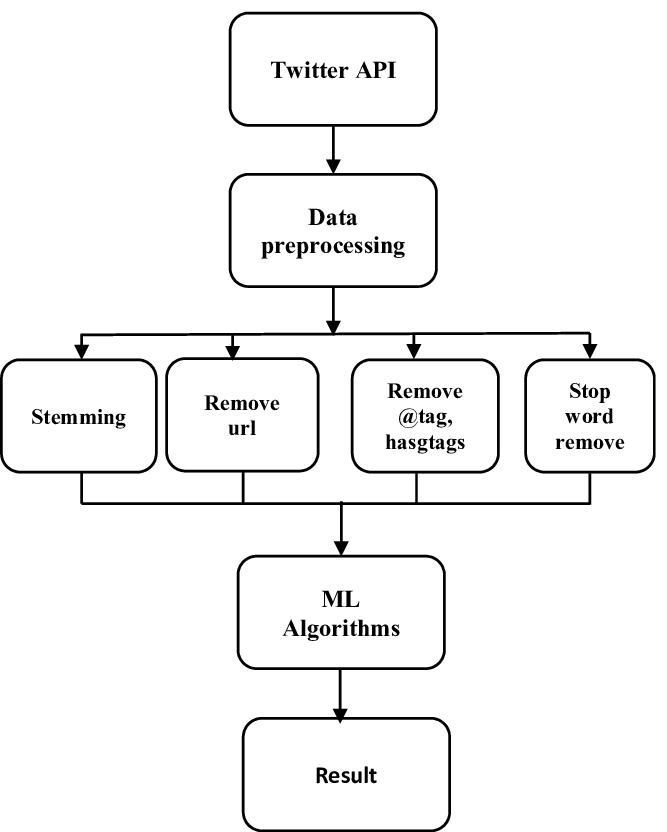

In [33]:
#convert to lower case
df['OriginalTweet']=df['OriginalTweet'].apply(lambda x:x.lower())
df['OriginalTweet'].sample(5)

4292     went into the grocery store a couple days back...
37012    ag morrisey's office  has received around 600 ...
25752    as delawareâs stay-at-home ordinances during ...
24220    https://t.co/5puumcf2us many of us are spendin...
33624    remember to keep your online shopping to essen...
Name: OriginalTweet, dtype: object

In [34]:
#Punctuation Removal
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def remove_punctuation(tweet):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return tweet.translate(translator)

In [36]:
#apply the function to column
df['OriginalTweet']=df['OriginalTweet'].apply(remove_punctuation)
df.head(10)

,OriginalTweet,Sentiment
0,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Extremely Negative
5,as news of the regionâs first confirmed covid...,Positive
6,cashier at grocery store was sharing his insig...,Positive
7,was at the supermarket today didnt buy toilet ...,Neutral
8,due to covid19 our retail store and classroom ...,Positive
9,for corona preventionwe should stop to buy thi...,Negative


In [37]:
#remove URLs
import re
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [38]:
#apply the remove_URL function to column
df['OriginalTweet']=df['OriginalTweet'].apply(remove_URL)
df['OriginalTweet'][0]

'menyrbie philgahan chrisitv  and  and '

### **Removing stopwords**

In [39]:
#Extract the stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [41]:
# function to remove stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words(by using list comprehension)
    text = [word.lower() for word in text.split() if word.lower() not in sw] # it will create a list
    # joining the list of words with space separator
    #return " ".join(text)
    return (text)

In [42]:
df['stopward_removal_Tweet']=df['OriginalTweet'].apply(lambda x: stopwords(x))

In [43]:
df.head(5)

,OriginalTweet,Sentiment,stopward_removal_Tweet
0,menyrbie philgahan chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]"
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p..."
2,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworths, give, eld..."
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,..."
4,me ready to go at supermarket during the covid...,Extremely Negative,"[ready, go, supermarket, covid19, outbreak, im..."


###**stemming** 

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.

In [44]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
#df['clean_tweet'] = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [45]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

df['stemmed'] = df['stopward_removal_Tweet'].apply(lambda x: stemming(x))


In [46]:
df.stemmed.head()

0                           menyrbi philgahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas dont panic enough f...
4    readi go supermarket covid19 outbreak im paran...
Name: stemmed, dtype: object

##**Lemmatizaing**

It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

In [47]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [48]:
# Lemmatizing
def lemming(text):
    text=[lemmatizer.lemmatize(y) for y in text]
    return ("".join(text))

In [49]:
df['clean_tweet']=df['stemmed'].apply(lambda x:lemming(x))

In [50]:
df.head()

,OriginalTweet,Sentiment,stopward_removal_Tweet,stemmed,clean_tweet
0,menyrbie philgahan chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,menyrbi philgahan chrisitv
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advic talk neighbour famili exchang phone numb...
2,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronaviru australia woolworth give elderli di...
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,food stock one empti pleas dont panic enough f...
4,me ready to go at supermarket during the covid...,Extremely Negative,"[ready, go, supermarket, covid19, outbreak, im...",readi go supermarket covid19 outbreak im paran...,readi go supermarket covid19 outbreak im paran...


###**wordcloud of tweet and sentiments**

word clould are visual data of text data - simple text analysis . word cloud display the most prominant or frequent worda in a body of text

In [51]:
from wordcloud import WordCloud

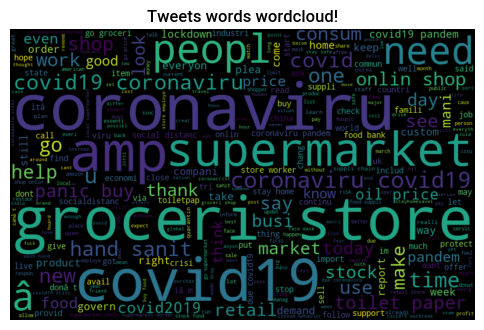

In [52]:
# creating wordcloud for various terms in tweet column
all_words = ' '.join(text for text in df['clean_tweet'])
all_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(all_words)

plt.title('Tweets words wordcloud!')
plt.imshow(all_words_cloud, interpolation="bilinear")
plt.axis('off');

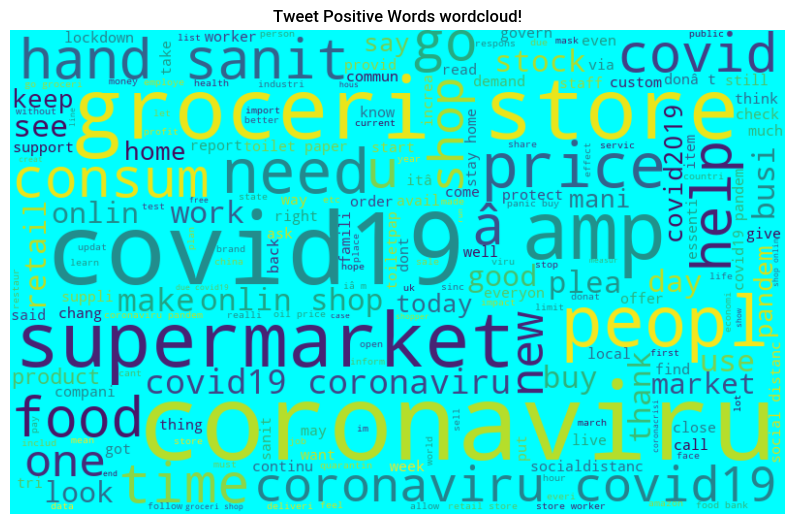

In [53]:
#creating wordcloud for positive sentiments
Positive_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Positive']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(Positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Positive Words wordcloud!')
plt.show()


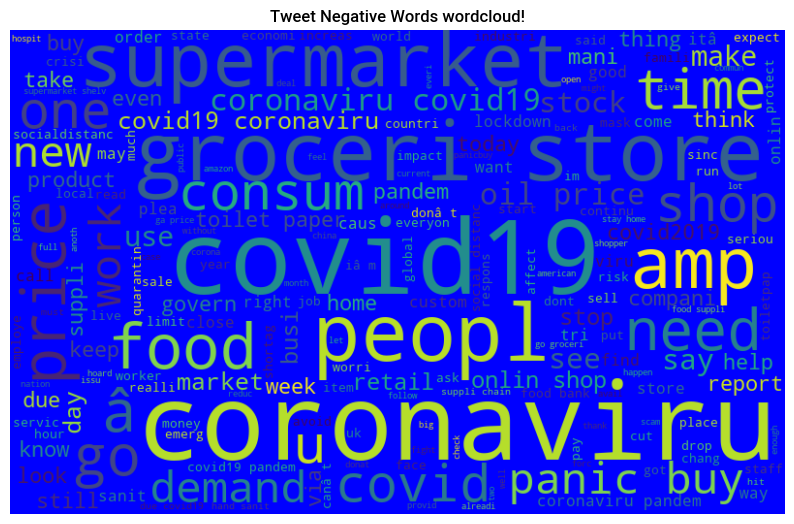

In [54]:
#creating wordcloud for negative sentiments
Negative_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Negative']])

wordcloud = WordCloud(background_color = 'blue', width=800, height=500, random_state = 0, max_font_size = 110).generate(Negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Negative Words wordcloud!')
plt.show()


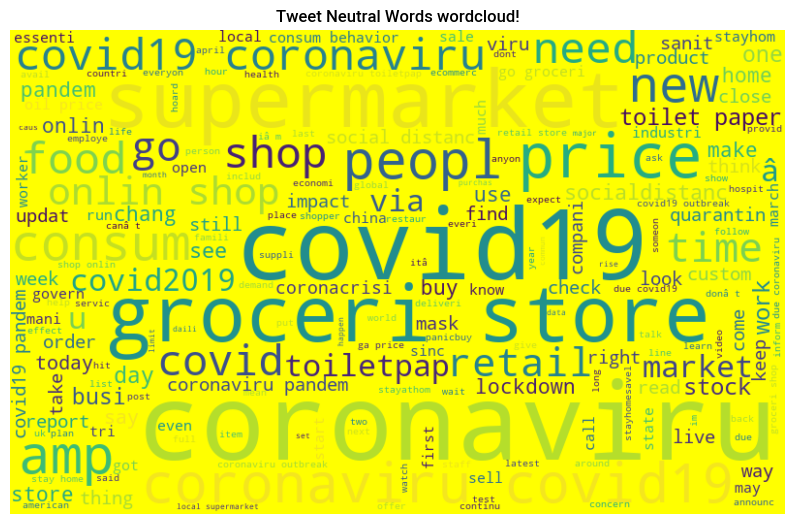

In [55]:
#creating wordcloud for Neutral sentiments
Neutral_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Neutral']])

wordcloud = WordCloud(background_color = 'yellow', width=800, height=500, random_state = 0, max_font_size = 110).generate(Neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Neutral Words wordcloud!')
plt.show()


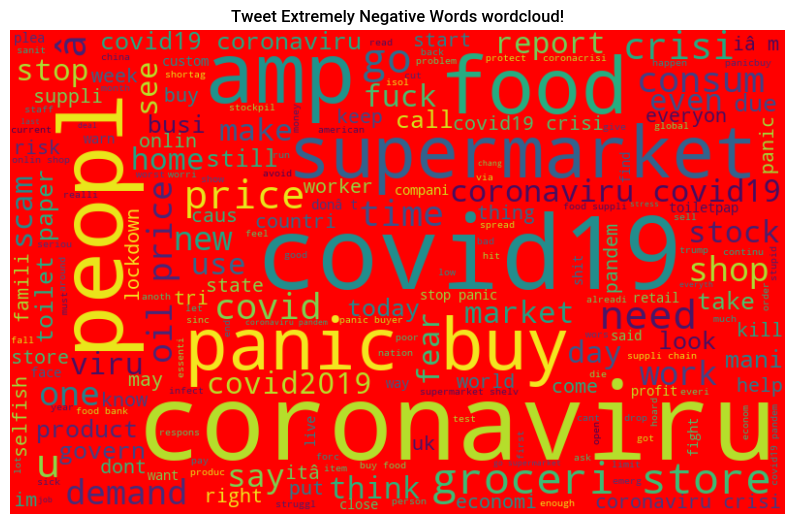

In [56]:
#creating wordcloud for Neutral sentiments
Extremely_Negative_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Extremely Negative']])

wordcloud = WordCloud(background_color = 'red', width=800, height=500, random_state = 0, max_font_size = 110).generate(Extremely_Negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Extremely Negative Words wordcloud!')
plt.show()

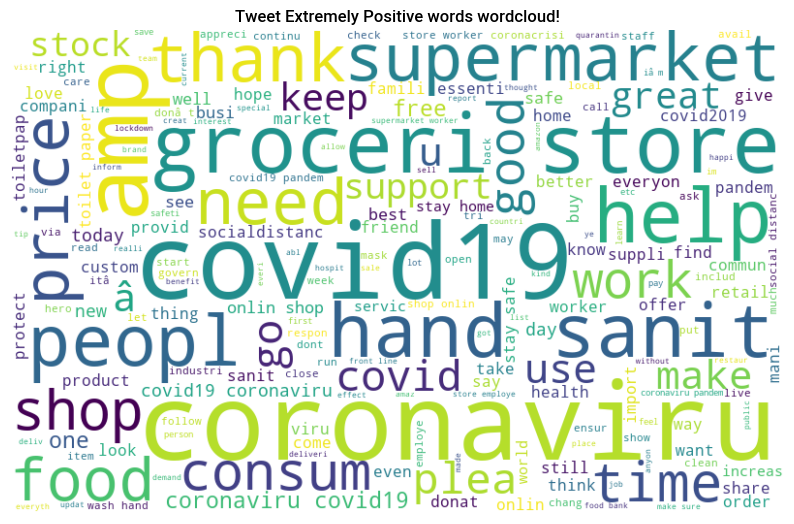

In [57]:
#creating wordcloud for Neutral sentiments
Extremely_Positive_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Extremely Positive']])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(Extremely_Positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Extremely Positive words wordcloud!')
plt.show()

###**data prepration**

In [58]:
# Data has 5 classes, let's convert them to 3

def classes_def(x):
    
    if x ==  "Extremely Positive":
        return "positive"
    elif x == "Extremely Negative":
        return "negative"
    elif x == "Negative":
        return "negative"
    elif x ==  "Positive":
        return "positive"
    else:
        return "neutral"

# apply function on sentiment column   
df['Sentiment']=df['Sentiment'].apply(lambda x:classes_def(x))

In [59]:
df['Sentiment']

0         neutral
1        positive
2        positive
3        positive
4        negative
           ...   
41152     neutral
41153    negative
41154    positive
41155     neutral
41156    negative
Name: Sentiment, Length: 41157, dtype: object

In [60]:
# providing necessary class values
def label_def(x):
  if x ==  "positive":
      return "1"
  elif x == "negative":
      return "-1"
  elif x == "neutral":
      return "0"
    
# apply function on sentiment column    
df['Sentiment']=df['Sentiment'].apply(lambda x:label_def(x))

In [61]:
df.head()

,OriginalTweet,Sentiment,stopward_removal_Tweet,stemmed,clean_tweet
0,menyrbie philgahan chrisitv and and,0,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,menyrbi philgahan chrisitv
1,advice talk to your neighbours family to excha...,1,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advic talk neighbour famili exchang phone numb...
2,coronavirus australia woolworths to give elder...,1,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronaviru australia woolworth give elderli di...
3,my food stock is not the only one which is emp...,1,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,food stock one empti pleas dont panic enough f...
4,me ready to go at supermarket during the covid...,-1,"[ready, go, supermarket, covid19, outbreak, im...",readi go supermarket covid19 outbreak im paran...,readi go supermarket covid19 outbreak im paran...


###**model fitting : train_test split**

In [62]:
X = df['clean_tweet']
y = df['Sentiment']

In [63]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32925,)
(32925,)
(8232,)
(8232,)


In [66]:
df['clean_tweet']

0                               menyrbi philgahan chrisitv
1        advic talk neighbour famili exchang phone numb...
2        coronaviru australia woolworth give elderli di...
3        food stock one empti pleas dont panic enough f...
4        readi go supermarket covid19 outbreak im paran...
                               ...                        
41152    airlin pilot offer stock supermarket shelv nz ...
41153    respons complaint provid cite covid19 relat de...
41154    know itâ get tough kameronwild ration toilet ...
41155    wrong smell hand sanit start turn coronaviru c...
41156    tartiicat well newus rift go 70000 amazon rn a...
Name: clean_tweet, Length: 41157, dtype: object

###**CountVectorizer, TfidfVectorizer**

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [68]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())

In [69]:
# TF-IDF
tweet_v=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tweet_v_X_train=tweet_v.fit_transform(X_train.astype(str).str.strip())

In [70]:
tweet_v_X_train.shape

(32925, 19837)

In [71]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tweet_v_X_test=tweet_v.transform(X_test.astype(str).str.strip())

##**Model Training**

##**Multinomial Naive bayes classifier**

In [72]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(tweet_v_X_train, y_train)

In [73]:
predictions_test = clf.predict(tweet_v_X_test)
predictions_train = clf.predict(tweet_v_X_train)

In [74]:
# getting train set confusion matrix
print("**confusion matrix for training set**")
labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(predictions_train,y_train)
print(cm_train)
print("\n")
# getting test set confusion matrix
print("**confusion matrix for test set**")
labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_test,y_test)
print(cm_test)

**confusion matrix for training set**
[[ 9958  1480  1356]
 [  107  1653    79]
 [ 2271  3027 12994]]


**confusion matrix for test set**
[[2149  437  511]
 [  27  212   28]
 [ 886  904 3078]]


In [75]:
# getting differant scores of train set
print("**Scores for training set**")
print('Accuracy : ',accuracy_score(predictions_train,y_train)*100) 
print('Precision : ',precision_score(predictions_train,y_train, average = 'weighted')*100)
print('Recall : ',recall_score(predictions_train,y_train, average = 'weighted')*100)
print('F1-score: ',f1_score(predictions_train, y_train, average='weighted')*100)
print("\n")

# getting differant scores of test set
print("**Scores for test set**")
print('Accuracy : ',accuracy_score(predictions_test,y_test))
print('Precision : ',precision_score(predictions_test,y_test, average = 'weighted'))
print('Recall : ',recall_score(predictions_test,y_test, average = 'weighted'))
print('F1-score : ',f1_score(predictions_test, y_test, average='weighted'))

**Scores for training set**
Accuracy :  74.73044798785118
Precision :  82.89752973696667
Recall :  74.73044798785118
F1-score:  77.22886512147775


**Scores for test set**
Accuracy :  0.6607142857142857
Precision :  0.7716946066838339
Recall :  0.6607142857142857
F1-score :  0.6991283315421244


In [76]:
# getting classification report for train and test sets

print('**Train set report**')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('**Test set report**')
print("\n")
print(classification_report(y_test,predictions_test))

**Train set report**


              precision    recall  f1-score   support

          -1       0.78      0.81      0.79     12336
           0       0.90      0.27      0.41      6160
           1       0.71      0.90      0.79     14429

    accuracy                           0.75     32925
   macro avg       0.80      0.66      0.67     32925
weighted avg       0.77      0.75      0.72     32925



**Test set report**


              precision    recall  f1-score   support

          -1       0.69      0.70      0.70      3062
           0       0.79      0.14      0.23      1553
           1       0.63      0.85      0.73      3617

    accuracy                           0.66      8232
   macro avg       0.71      0.56      0.55      8232
weighted avg       0.69      0.66      0.62      8232



##**Logistic regression**

In [77]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression().fit(tweet_v_X_train, y_train)

In [78]:
prediction_test = classifier_log.predict(tweet_v_X_test)
prediction_train = classifier_log.predict(tweet_v_X_train)

In [79]:
# getting train set confusion matrix
print("**confusion matrix for training set**")
labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(prediction_train,y_train)
print(cm_train)
print("\n")
# getting test set confusion matrix
print("**confusion matrix for test set**")
labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(prediction_test,y_test)
print(cm_test)

**confusion matrix for training set**
[[11111   632   769]
 [  286  4776   228]
 [  939   752 13432]]


**confusion matrix for test set**
[[2452  314  366]
 [ 167  897  169]
 [ 443  342 3082]]


Here ,

FOR TRAINING SET : TP = 10768 , FN=1557 , FP = 1568 , TN = 19032

FOR TEST SET : TP = 2450 ,FN = 593 , FP = 1568 , TN = 4562

In [80]:
# getting differant scores of train set
print("**Scores for training set**")
print('Accuracy : ',accuracy_score(prediction_train,y_train)*100) 
print('Precision : ',precision_score(prediction_train,y_train, average = 'weighted')*100)
print('Recall : ',recall_score(prediction_train,y_train, average = 'weighted')*100)
print('F1-score: ',f1_score(prediction_train, y_train, average='weighted')*100)
print("\n")

# getting differant scores of test set
print("**Scores for test set**")
print('Accuracy : ',accuracy_score(prediction_test,y_test))
print('Precision : ',precision_score(prediction_test,y_test, average = 'weighted'))
print('Recall : ',recall_score(prediction_test,y_test, average = 'weighted'))
print('F1-score : ',f1_score(prediction_test, y_test, average='weighted'))

**Scores for training set**
Accuracy :  89.04783599088837
Precision :  89.44278494076362
Recall :  89.04783599088837
F1-score:  89.14273295474754


**Scores for test set**
Accuracy :  0.7812196307094267
Precision :  0.7914537590963787
Recall :  0.7812196307094267
F1-score :  0.7845765574844312


In [81]:
# getting classification report for train and test sets

print('**Train set report**')
print("\n")
print(classification_report(y_train,prediction_train))
print("\n")
print('**Test set report**')
print("\n")
print(classification_report(y_test,prediction_test))

**Train set report**


              precision    recall  f1-score   support

          -1       0.89      0.90      0.89     12336
           0       0.90      0.78      0.83      6160
           1       0.89      0.93      0.91     14429

    accuracy                           0.89     32925
   macro avg       0.89      0.87      0.88     32925
weighted avg       0.89      0.89      0.89     32925



**Test set report**


              precision    recall  f1-score   support

          -1       0.78      0.80      0.79      3062
           0       0.73      0.58      0.64      1553
           1       0.80      0.85      0.82      3617

    accuracy                           0.78      8232
   macro avg       0.77      0.74      0.75      8232
weighted avg       0.78      0.78      0.78      8232



**average=micro** says the function to compute f1 by considering total true positives, false negatives and false positives (no matter of the prediction for each label in the dataset)

**average=macro** says the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset.

**average=weighted** says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.

##**Decision trees classifier**

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(tweet_v_X_train, y_train)

predictions_test = dtree_model.predict(tweet_v_X_test)
predictions_train = dtree_model.predict(tweet_v_X_train) 

### for perfromance measure use confusion matrix  
Confusion Matrix allows us to measure Recall, Precision,
Accuracy and AUC-ROC curve are the metrics to measure the performance of
the model.

In [83]:
# getting train set confusion matrix
print("**confusion matrix for training set**")
labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(prediction_train,y_train)
print(cm_train)
print("\n")
# getting test set confusion matrix
print("**confusion matrix for test set**")
labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(prediction_test,y_test)
print(cm_test)

**confusion matrix for training set**
[[11111   632   769]
 [  286  4776   228]
 [  939   752 13432]]


**confusion matrix for test set**
[[2452  314  366]
 [ 167  897  169]
 [ 443  342 3082]]


In [84]:
# getting differant scores of train set
print("**Scores for training set**")
print('Accuracy : ',accuracy_score(prediction_train,y_train)*100) 
print('Precision : ',precision_score(prediction_train,y_train, average = 'weighted')*100)
print('Recall : ',recall_score(prediction_train,y_train, average = 'weighted')*100)
print('F1-score: ',f1_score(prediction_train, y_train, average='weighted')*100)
print("\n")

# getting differant scores of test set
print("**Scores for test set**")
print('Accuracy : ',accuracy_score(prediction_test,y_test))
print('Precision : ',precision_score(prediction_test,y_test, average = 'weighted'))
print('Recall : ',recall_score(prediction_test,y_test, average = 'weighted'))
print('F1-score : ',f1_score(prediction_test, y_test, average='weighted'))

**Scores for training set**
Accuracy :  89.04783599088837
Precision :  89.44278494076362
Recall :  89.04783599088837
F1-score:  89.14273295474754


**Scores for test set**
Accuracy :  0.7812196307094267
Precision :  0.7914537590963787
Recall :  0.7812196307094267
F1-score :  0.7845765574844312


In [85]:
# getting classification report for train and test sets

print('**Train set report**')
print("\n")
print(classification_report(y_train,prediction_train))
print("\n")
print('**Test set report**')
print("\n")
print(classification_report(y_test,prediction_test))

**Train set report**


              precision    recall  f1-score   support

          -1       0.89      0.90      0.89     12336
           0       0.90      0.78      0.83      6160
           1       0.89      0.93      0.91     14429

    accuracy                           0.89     32925
   macro avg       0.89      0.87      0.88     32925
weighted avg       0.89      0.89      0.89     32925



**Test set report**


              precision    recall  f1-score   support

          -1       0.78      0.80      0.79      3062
           0       0.73      0.58      0.64      1553
           1       0.80      0.85      0.82      3617

    accuracy                           0.78      8232
   macro avg       0.77      0.74      0.75      8232
weighted avg       0.78      0.78      0.78      8232



In [86]:
from sklearn.svm import LinearSVC

In [87]:
SVCmodel = LinearSVC()
SVCmodel.fit(tweet_v_X_train, y_train)

LinearSVC()

In [88]:
from sklearn.svm import SVC
svclassifier = SVC().fit(tweet_v_X_train, y_train)


In [ ]:
predictions_test = svclassifier.predict(tweet_v_X_test)
predictions_train = svclassifier.predict(tweet_v_X_train) 

In [ ]:
# getting train set confusion matrix
print("**confusion matrix for training set**")
labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(predictions_train,y_train)
print(cm_train)
print("\n")
# getting test set confusion matrix
print("**confusion matrix for test set**")
labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_test,y_test)
print(cm_test)

In [ ]:
# getting differant scores of train set
print("**Scores for training set**")
print('Accuracy : ',accuracy_score(predictions_train,y_train)*100) 
print('Precision : ',precision_score(predictions_train,y_train, average = 'weighted')*100)
print('Recall : ',recall_score(predictions_train,y_train, average = 'weighted')*100)
print('F1-score: ',f1_score(predictions_train, y_train, average='weighted')*100)
print("\n")

# getting differant scores of test set
print("**Scores for test set**")
print('Accuracy : ',accuracy_score(predictions_test,y_test))
print('Precision : ',precision_score(predictions_test,y_test, average = 'weighted'))
print('Recall : ',recall_score(predictions_test,y_test, average = 'weighted'))
print('F1-score : ',f1_score(predictions_test, y_test, average='weighted'))

In [ ]:
# getting classification report for train and test sets

print('**Train set report**')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('**Test set report**')
print("\n")
print(classification_report(y_test,predictions_test))

##**Conclusion**

1.